<a href="https://colab.research.google.com/github/vacuum1/MauvaiseHerbe/blob/master/Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
cd 'drive/My Drive/Recherche/MonProjet/'

/content/drive/My Drive/Recherche/MonProjet


In [5]:
import tensorflow as tf
import datetime, os

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

import numpy as np
import matplotlib.pyplot as plt

In [7]:
PATH = "/content/drive/My Drive/Recherche/MonProjet/data" #Definir le chemin des données

In [8]:
train_dir = os.path.join(PATH, 'train') #Chemin vers les données d'entrainements
validation_dir = os.path.join(PATH, 'validation')#Chemin vers les données de validation

In [9]:
train_comptonie_dir = os.path.join(train_dir, 'Comptonie')
train_kalmia_dir = os.path.join(train_dir, 'Kalmia')
train_qutretemps_dir = os.path.join(train_dir, 'QutreTemps')
train_tussock_dir = os.path.join(train_dir, 'Tussock')
validation_comptonie_dir = os.path.join(validation_dir, 'Comptonie')
validation_kalmia_dir = os.path.join(validation_dir, 'Kalmia')
validation_qutretemps_dir = os.path.join(validation_dir, 'QutreTemps')
validation_tussock_dir = os.path.join(validation_dir, 'Tussock')

In [10]:
num_comptonie_tr = len(os.listdir(train_comptonie_dir))
num_kalmia_tr = len(os.listdir(train_kalmia_dir))
num_qutretemps_tr = len(os.listdir(train_qutretemps_dir))
num_tussock_tr = len(os.listdir(train_tussock_dir))

num_comptonie_val = len(os.listdir(validation_comptonie_dir))
num_kalmia_val= len(os.listdir(validation_kalmia_dir))
num_qutretemps_val = len(os.listdir(validation_qutretemps_dir))
num_tussock_val = len(os.listdir(validation_tussock_dir))

total_train = num_comptonie_tr + num_kalmia_tr + num_qutretemps_tr + num_tussock_tr
total_val = num_comptonie_val + num_kalmia_val + num_qutretemps_val + num_tussock_val


In [11]:
print('total training comptonie images:', num_comptonie_tr)
print('total training kalmia images:', num_kalmia_tr)
print('total training qutretemps images:', num_qutretemps_tr)
print('total training tussock images:', num_tussock_tr)

print('total validation comptonie images:', num_comptonie_val)
print('total validation kalmia images:', num_kalmia_val)
print('total validation qutretemps images:', num_qutretemps_val)
print('total validation tussock images:', num_tussock_val)
print("------")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training comptonie images: 1200
total training kalmia images: 1200
total training qutretemps images: 1200
total training tussock images: 1200
total validation comptonie images: 30
total validation kalmia images: 30
total validation qutretemps images: 30
total validation tussock images: 30
------
Total training images: 4800
Total validation images: 120


In [12]:
# assignement des variables pour le prétraitement
batch_size = 64
epochs = 5
IMG_HEIGHT = 540
IMG_WIDTH = 960

In [13]:
train_image_generator = ImageDataGenerator(rescale=1./255) #prétraitement des données d'entrainement
validation_image_generator = ImageDataGenerator(rescale=1./255) #prétraitement des données de validation

In [14]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                           class_mode='categorical')

Found 4800 images belonging to 4 classes.


In [15]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=validation_dir,
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                           class_mode='categorical')

Found 120 images belonging to 4 classes.


In [41]:
sample_training_images, _ = next(train_data_gen)

In [18]:
# Afficher les images dans une grille
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

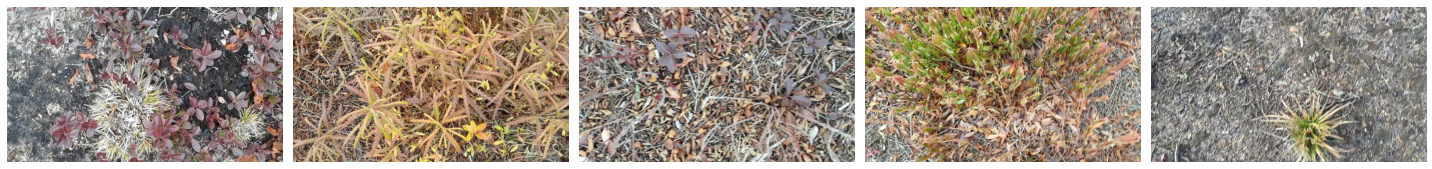

In [19]:
plotImages(sample_training_images[:5])

In [16]:
model = Sequential([
    Conv2D(16, 3,  activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(4, activation="softmax")
])

In [17]:
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 538, 958, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 269, 479, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 267, 477, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 133, 238, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 131, 236, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 65, 118, 64)       0         
_________________________________________________________________
flatten (Flatten)            (None, 490880)            0

In [19]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
75/75 [==============================] - 2292s 31s/step - loss: 9.4586 - accuracy: 0.3927 - val_loss: 2.0364 - val_accuracy: 0.8281
Epoch 2/5
75/75 [==============================] - 2320s 31s/step - loss: 1.7474 - accuracy: 0.6321 - val_loss: 1.2494 - val_accuracy: 0.8594
Epoch 3/5
75/75 [==============================] - 2353s 31s/step - loss: 1.3724 - accuracy: 0.7271 - val_loss: 1.0338 - val_accuracy: 0.8594
Epoch 4/5
75/75 [==============================] - 2381s 32s/step - loss: 1.1551 - accuracy: 0.8548 - val_loss: 0.9007 - val_accuracy: 1.0000
Epoch 5/5
75/75 [==============================] - 2391s 32s/step - loss: 1.0815 - accuracy: 0.9071 - val_loss: 0.9270 - val_accuracy: 1.0000


In [20]:
%reload_ext tensorboard

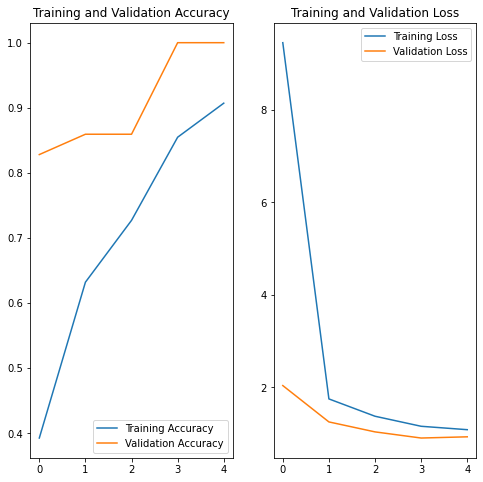

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [ ]:
n_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))


Found 4800 images belonging to 4 classes.


In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]


In [ ]:
# Afficher les images dans une grille
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

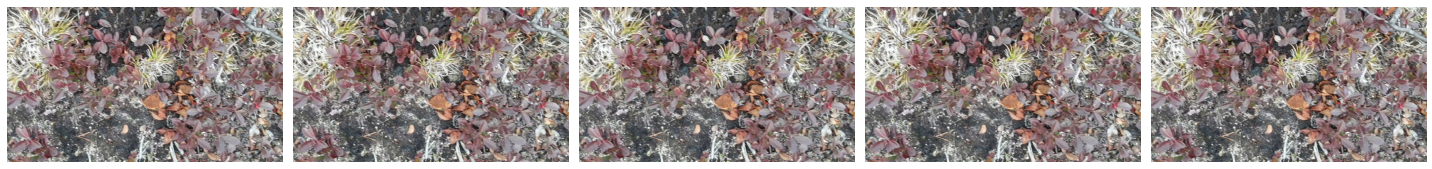

In [ ]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)


In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)


In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]


Found 4800 images belonging to 4 classes.


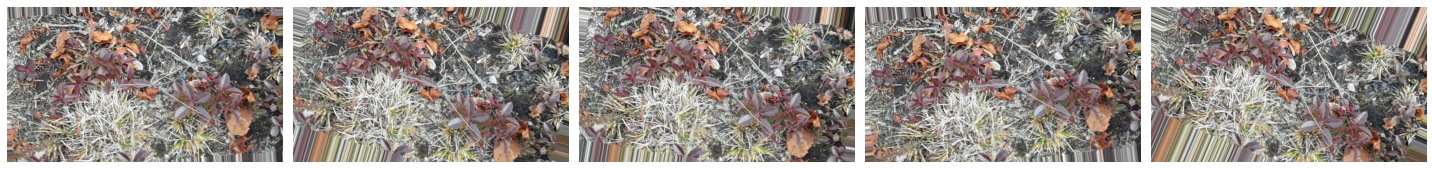

In [ ]:
plotImages(augmented_images)


In [ ]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 


In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]


Found 4800 images belonging to 4 classes.


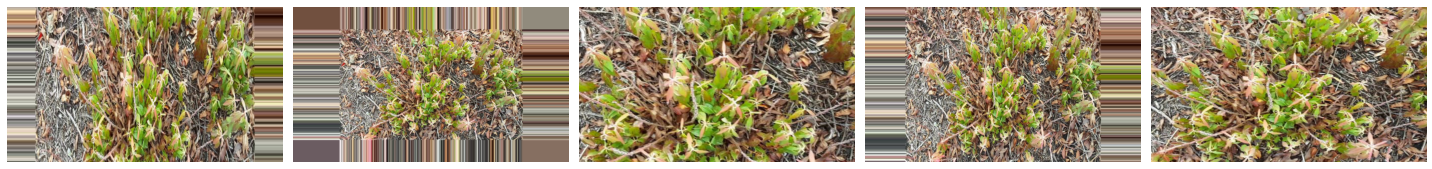

In [ ]:
plotImages(augmented_images)


In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')


Found 4800 images belonging to 4 classes.


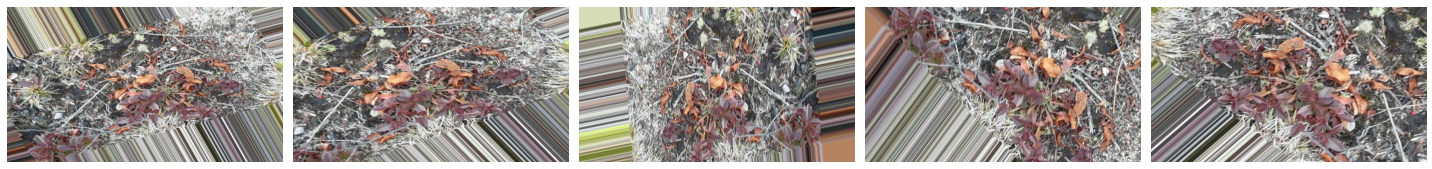

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)


In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)


In [ ]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')


Found 120 images belonging to 4 classes.


In [ ]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])


In [ ]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 540, 960, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 270, 480, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 270, 480, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 270, 480, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 135, 240, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 135, 240, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 67, 120, 64)      

In [ ]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
7/7 [==============================] - 162s 23s/step - loss: -2801.0156 - accuracy: 0.2232 - val_loss: -9565.3096 - val_accuracy: 0.2500
Epoch 2/15
7/7 [==============================] - 151s 22s/step - loss: -29394.7910 - accuracy: 0.2634 - val_loss: -77331.8516 - val_accuracy: 0.2500
Epoch 3/15
7/7 [==============================] - 150s 21s/step - loss: -223800.4219 - accuracy: 0.2902 - val_loss: -356030.0938 - val_accuracy: 0.2500
Epoch 4/15
7/7 [==============================] - 152s 22s/step - loss: -594522.0000 - accuracy: 0.2723 - val_loss: -1270534.7500 - val_accuracy: 0.2500
Epoch 5/15
7/7 [==============================] - 149s 21s/step - loss: -1796823.3750 - accuracy: 0.2902 - val_loss: -3981335.5000 - val_accuracy: 0.2500
Epoch 6/15
7/7 [==============================] - 149s 21s/step - loss: -4821893.5000 - accuracy: 0.2455 - val_loss: -10720489.0000 - val_accuracy: 0.2500
Epoch 7/15
7

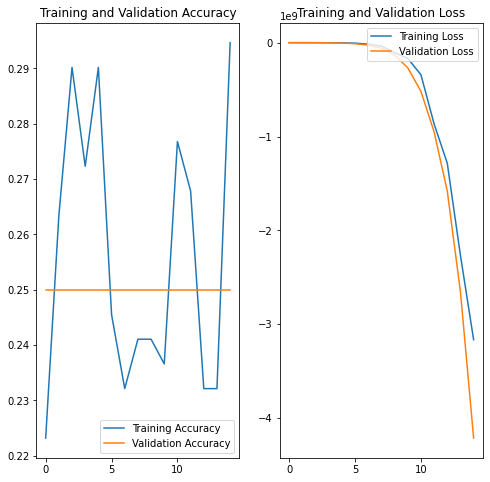

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
%reload_ext tensorboard

In [ ]:
!pwd

/content/drive/My Drive/Recherche/MonProjet


In [ ]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 799), started 0:51:32 ago. (Use '!kill 799' to kill it.)

<IPython.core.display.Javascript object>